In [1]:
from collections import Iterable
from typing import Union, Tuple
import time
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plotter

c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [2]:
# deflaut ode function
def ode(vector_y: [float], t_time: float, b: float, c: float) -> [float]:
    """
    function of implemented ODE
    Args:
        vector_y(vector of floats): state variable vector
        t_time(float): time argument
        b(float): parameter of ODE
        c(float): second param of ODE
    Returns:
        vector of derivative
    """
    theta, omega = vector_y
    dy_dt = [omega, -b * omega - c * np.exp(theta) * t_time / c * b]
    return dy_dt



In [3]:
def calculate_ode(ode_func, vector_args: [float], recalc_y0_: float, dy0, t_solve: int = 10, num_steps: int = 101) \
        -> Tuple[Union[np.ndarray, Iterable, int, float], dict]:
    """
        def that calculates ode (numeric calculation)
        Args:
            ode_func(lambda/func/meth) -> [float]
            vector_args(vector of floats): arguments that need to call ODE
            recalc_y0_(float): initial state of first parameter y
            dy0(float): initial state of the second parameter (derivative of second param)
            t_solve(int): len of solve
            num_steps(float): number of steps (need to accuracy)
        Returns:
            vector of derivative(vector of floats)
            OR in PyNamespaces Tuple[Union[np.ndarray, Iterable, int, float], dict]
        """
    recalc_y0_ = [recalc_y0_, dy0]
    t = np.linspace(0, t_solve, num_steps)
    _ode_solve_r = odeint(ode_func, recalc_y0_, t, vector_args)
    return _ode_solve_r

In [4]:
def v_render_phase_portrait(ode_func, vector_args: [float], delta_x: int = 1, delta_dx: int = 1,
                            start_x: int = 0, end_x: int = 5, start_dx: int = 0, end_dx: int = 5,
                            t_solve: int = 10, num_steps: int = 101):
    """
        def that plot ode portrait
        Args:
            ode_func(lambda/func/meth) -> [float]
            vector_args(vector of floats): arguments that need to call ODE
            delta_x (int): step of initial variable in horizontal axis (statement variable)
            delta_dx (int): step of initial variable in horizontal axis (statement variable)
            start_x (int): initial statement of interval of start params
            end_x (int): ending statement of interval of start params
            start_dx (int): initial statement of interval of start params (derivation of param)
            end_dx (int): ending statement of interval of start params (derivation of param)
            t_solve(int): len of solve
            num_steps(float): number of steps (need to accuracy)
        Returns:
            vector of derivative(vector of floats)
            OR in PyNamespaces Tuple[Union[np.ndarray, Iterable, int, float], dict]
    """
    for val_tuple in range(start_x, end_x, delta_x):  # values of y0
        for derivation_typ in range(start_dx, end_dx, delta_dx):   # values of dy0
            sol = calculate_ode(ode_func, vector_args, val_tuple, derivation_typ, t_solve, num_steps)
            plotter.plot(sol[:, 1], sol[:, 0], 'b')
    plotter.xlabel('x')
    plotter.ylabel('dx/dt')
    plotter.grid()
    plotter.show()

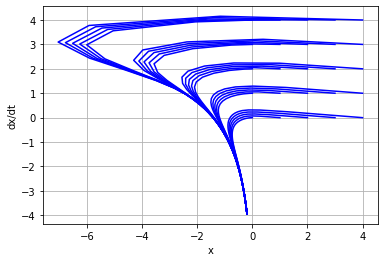

In [5]:
_args = (11, 55)
v_render_phase_portrait(ode, _args)

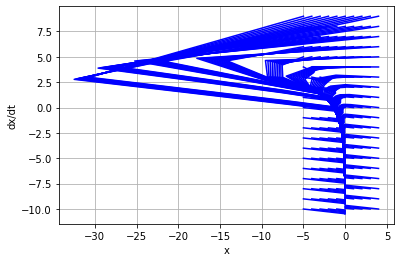

In [6]:
v_render_phase_portrait(ode, _args,1, 1, -10, 10, -5, 5, 45, 301)

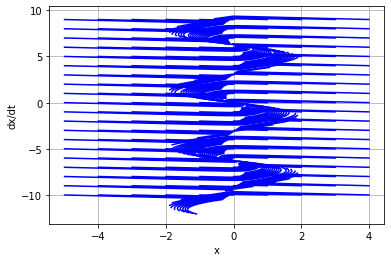

In [7]:
v_render_phase_portrait(lambda vector_y, t_time, b, c: 
                            [vector_y[1], -b * vector_y[1] - c * np.sin(vector_y[0]) * t_time / c * b],
                                _args,1, 1, -10, 10, -5, 5, 2, 100)

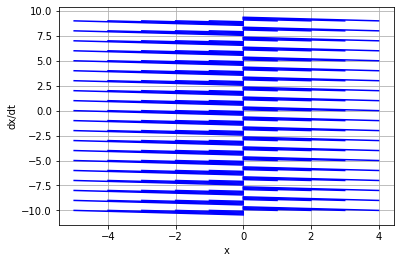

In [8]:
v_render_phase_portrait(lambda vector_y, t_time, b, c: 
                            [vector_y[1], -b * vector_y[1] - c * np.sin(vector_y[1])/b * t_time / c * b],
                                _args,1, 1, -10, 10, -5, 5, 2, 4000)

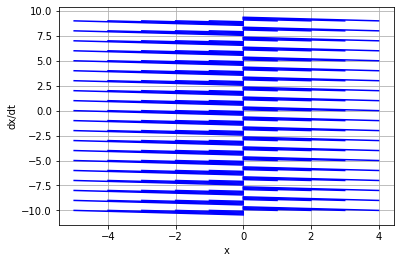

In [9]:
v_render_phase_portrait(lambda vector_y, t_time, b, c: 
                            [vector_y[1], -b * vector_y[1] - c * np.sin(vector_y[1])/b * t_time / c * b],
                                _args,1, 1, -10, 10, -5, 5, 2, 4000)

In [15]:
def duffing_graphing(omega: float = 2.0, gamma:  float = 0.1, h: float = 1e-1, T: int = 30000,
                     a: float = 0.5, b: float = 1 / 16.0, F_0: float = 2.5):
    def x_2(x, v):
        '''
        second derivative term for Taylor series
        '''
        return -gamma * v + 2.0 * a * x - 4.0 * b * x * x * x

    def x_3(x2, x, v):
        '''
        third derivative term for Taylor series
        '''
        return -gamma * x2 + 2.0 * a * v - 12.0 * b * x * x * v

    def x_4(x3, x2, x, v):
        '''
        fourth derivative term for Taylor series
        '''
        return -gamma * x3 + 2.0 * a * x2 - 12.0 * b * x * x * x2 - 24.0 * b * v * v * x

    def x_5(x4, x3, x2, x, v):
        '''
        fifth derivative term for Taylor series
        '''
        return -gamma * x4 + 2 * a * x3 - 12.0 * b * (x * x * x3 + 2.0 * x2 * x * v) - 24.0 * b * (
                    v * v * v + 2 * x * v * x2)

    t1 = time.time()  # times the computation
    period = 2 * np.pi / (1.0 * omega)
    # length of the simulation

    t = np.arange(0, T, h)

    # Trigonometric terms in derivatives. Evaluate before the loop
    x2F = F_0 * np.cos(omega * t)
    x3F = -F_0 * omega * np.sin(omega * t)
    x4F = -F_0 * omega * omega * np.cos(omega * t)
    x5F = F_0 * omega * omega * omega * np.sin(omega * t)

    # coefficients in front of Taylor series expansion
    # Evaluate before the loop
    coef1 = 0.5 * h ** 2.0
    coef2 = 1.0 / 6.0 * h ** 3.0
    coef3 = 1.0 / 24.0 * h ** 4.0
    coef4 = 1.0 / 120.0 * h ** 5.0

    # initial conditions
    v = 0.0
    x = 0.5

    position = np.zeros(len(t))
    velocity = np.zeros(len(t))
    position[0] = x

    for i in range(1, len(t)):
        d2 = x_2(x, v) + x2F[i]
        d3 = x_3(d2, x, v) + x3F[i]
        d4 = x_4(d3, d2, x, v) + x4F[i]
        d5 = x_5(d4, d3, d2, x, v) + x5F[i]
        # Taylor series expansion for x,v. Order h^5
        x += v * h + coef1 * d2 + coef2 * d3 + coef3 * d4 + coef4 * d5
        v += d2 * h + coef1 * d3 + coef2 * d4 + coef3 * d5
        position[i] = x
        velocity[i] = v

    strange_attractor = np.zeros([int(T / period), 2])
    k = 1
    for i in range(len(t)):
        if abs(t[i] - k * period) < h:
            strange_attractor[k - 1, 0] = position[i]
            strange_attractor[k - 1, 1] = velocity[i]
            k += 1

    t2 = time.time()
    print('computation takes ', np.round(t2 - t1, 2), ' seconds.')

    plotter.figure(1)
    plotter.plot(t[-3000:], position[-3000:], 'g-', linewidth=4.0)
    plotter.title('Trajectory of the oscillator', {'fontsize': 24})
    plotter.xlabel('time', {'fontsize': 24})
    plotter.ylabel('Position', {'fontsize': 24})
    plotter.tick_params(axis='both', labelsize=24)

    plotter.figure(2)
    plotter.plot(position[-3000:], velocity[-3000:], 'r-', linewidth=4.0)
    plotter.title('Phase space', {'fontsize': 24})
    plotter.xlim([-4.5, 4.5])
    plotter.xlabel('Position', {'fontsize': 24})
    plotter.ylabel('Momentum', {'fontsize': 24})
    plotter.tick_params(axis='both', labelsize=24)

    plotter.figure(3)
    plotter.scatter(strange_attractor[:, 0], strange_attractor[:, 1])
    plotter.xlabel('Position', {'fontsize': 24})
    plotter.ylabel('Momentum', {'fontsize': 24})
    plotter.title(r'Poincare Plot (Phase space at time = $\frac{2\pi N}{\omega}$, N = 1,2,3...)', {'fontsize': 24})
    plotter.tick_params(axis='both', labelsize=24)

    plotter.show((1, 2, 3))



computation takes  3.56  seconds.


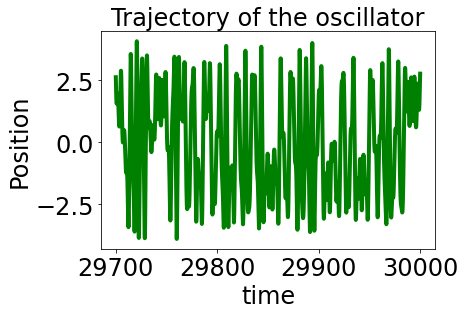

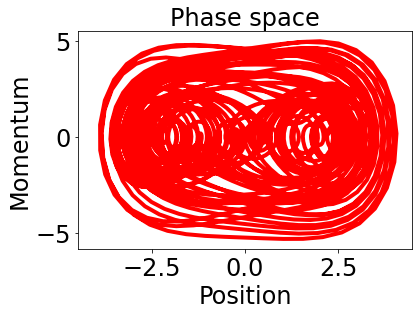

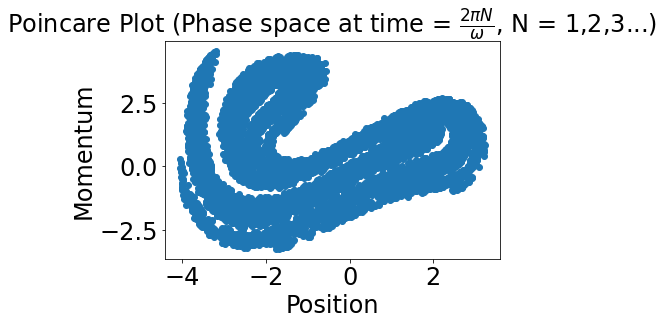

In [16]:
duffing_graphing()

computation takes  3.46  seconds.


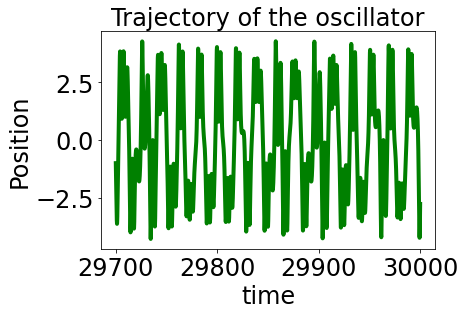

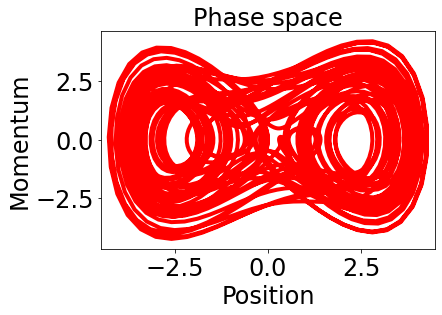

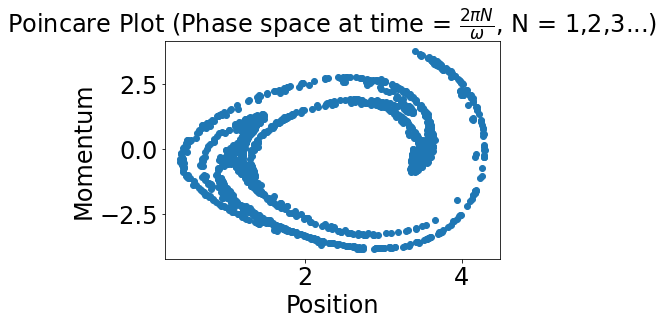

In [19]:
duffing_graphing(omega = 1/3)

computation takes  3.85  seconds.


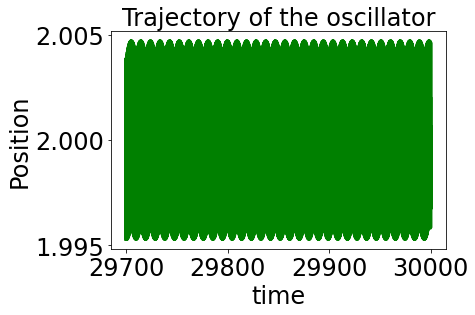

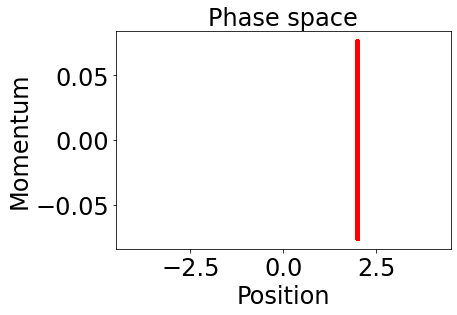

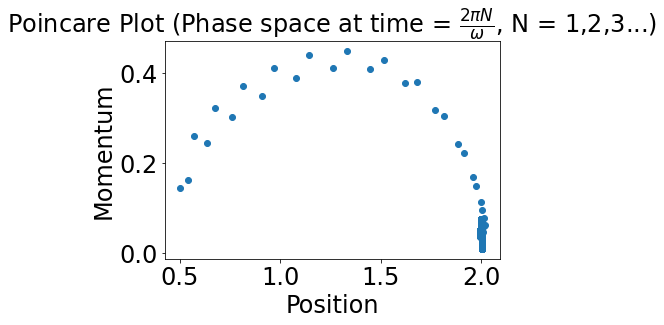

In [24]:
duffing_graphing(omega = 25, gamma = 2)

computation takes  3.69  seconds.


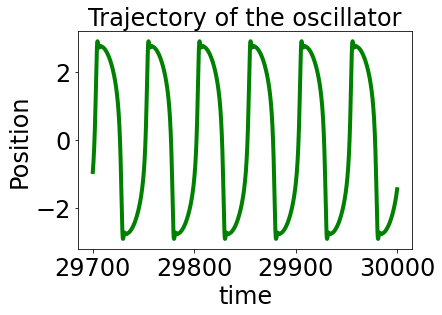

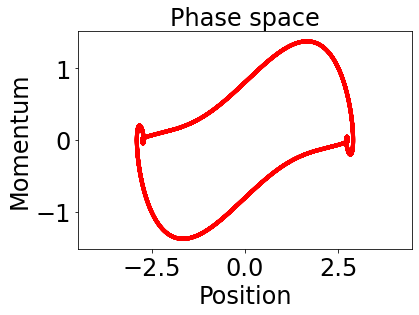

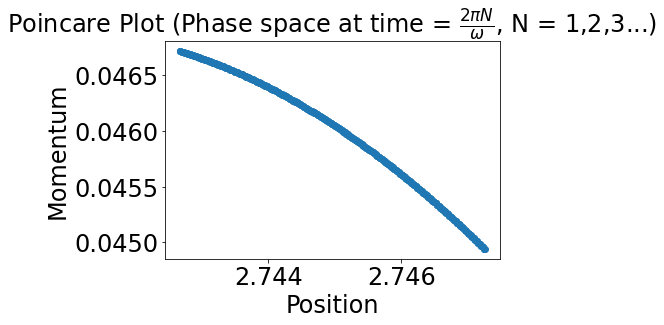

In [28]:
duffing_graphing(omega = 1/8, gamma = 2, h = 0.1)

computation takes  3.58  seconds.


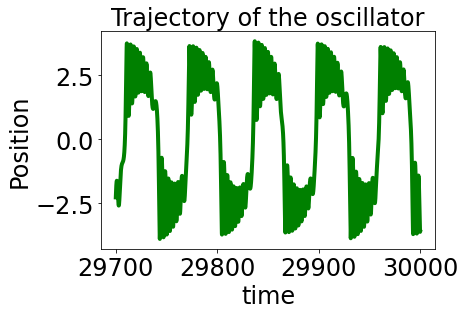

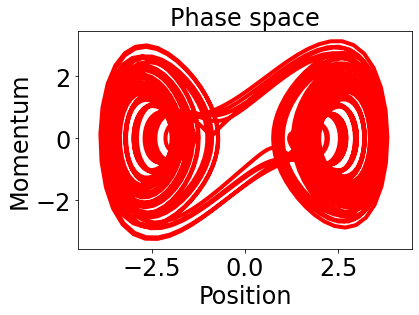

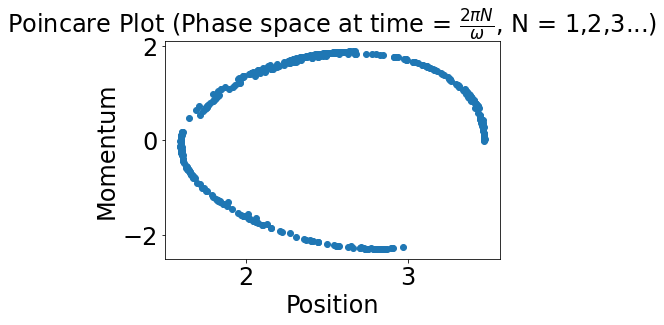

In [29]:
duffing_graphing(omega = 1/10, gamma = 0.1, h = 0.1)

computation takes  0.88  seconds.


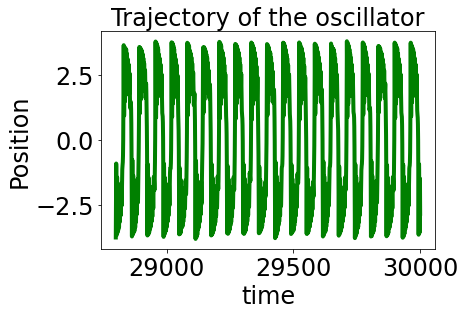

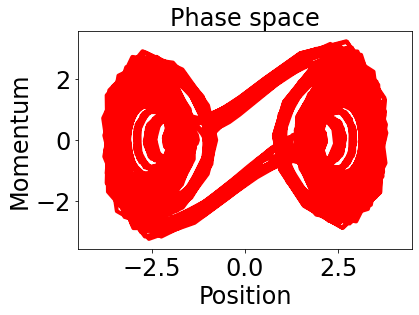

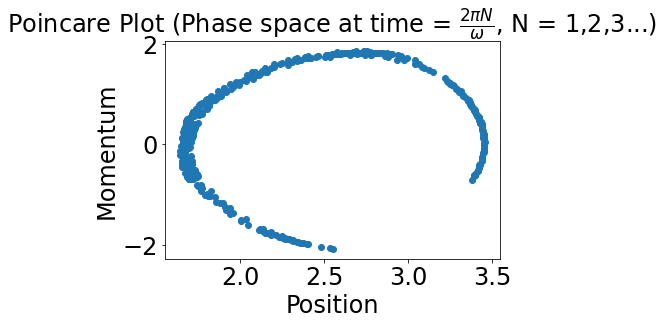

In [30]:
duffing_graphing(omega = 1/10, gamma = 0.1, h = 0.4)

computation takes  0.83  seconds.


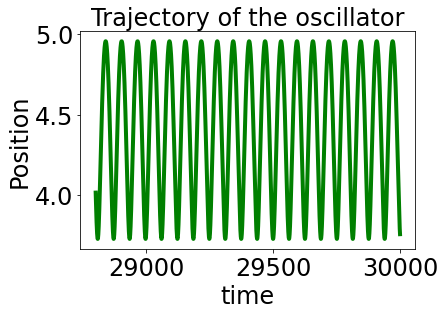

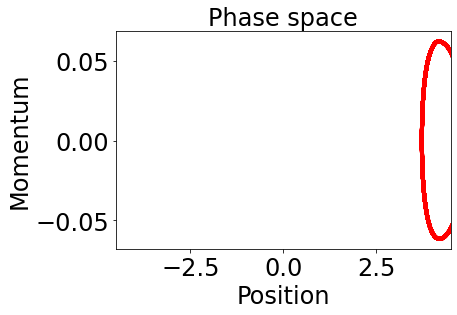

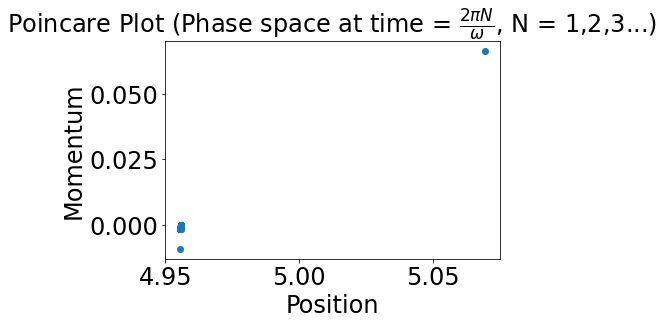

In [38]:
duffing_graphing(omega = 1/10, gamma = 0.1, h = 0.4, a=0.4, b=0.01, F_0=0.9)

computation takes  0.81  seconds.


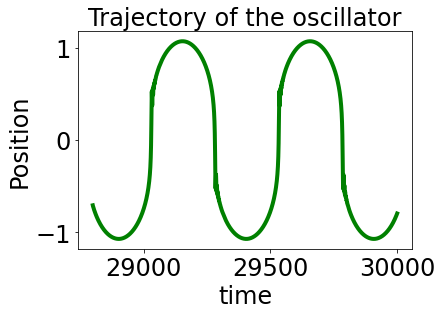

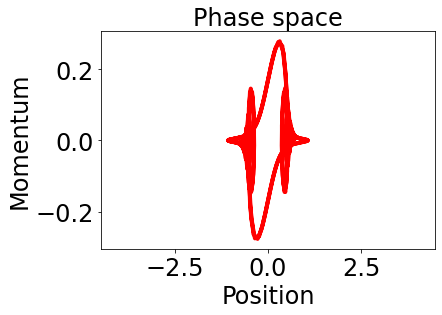

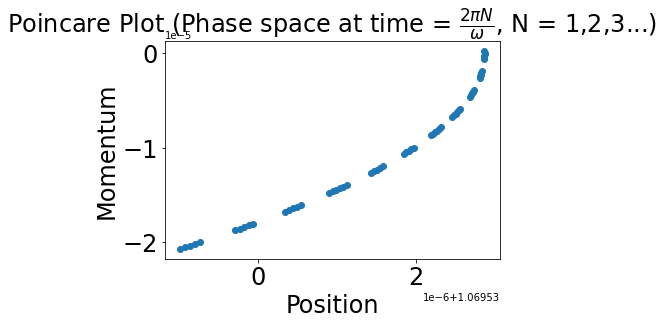

In [46]:
duffing_graphing(omega = 1/80, gamma = 0.4, h = 0.4, a=0.01, b=1.21, F_0=5.9)